The dataset contains data from January 4 until July 31. Each row describes the COVID-19 report for one day in one specific country (the first few rows show only China because the virus was only present in China at that time).

For each row, we have the following data points:

* Date_reported: The date when the data was reported in year-month-day format.
* Country: The country to which the report corresponds.
* New_cases: The number of new cases reported for that date and for that country.
* Cumulative_cases: The number of total cases up to that date in that country.
* New_deaths: The number of new deaths reported for that date and for that country.
* Cumulative_deaths: The number of total deaths up to that day in that country.

The rows in our dataset are listed in time order, starting with January 4 and ending with July 31.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

who_time_series = pd.read_csv('WHO_time_series.csv')
who_time_series.head()
who_time_series['Date_reported'] = pd.to_datetime(who_time_series['Date_reported'])
print(who_time_series.info())
print('\n')
print(who_time_series.head())
print('\n')
who_time_series.tail()

# We modify the Date_reported column to a datetime data type using pd.to_datetime().
# we're going to use a larger dataset that we've collected from the World Health Organization; COVID 19 Progression 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 6 columns):
Date_reported        31876 non-null datetime64[ns]
Country              31876 non-null object
New_cases            31876 non-null int64
Cumulative_cases     31876 non-null int64
New_deaths           31876 non-null int64
Cumulative_deaths    31876 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.5+ MB
None


  Date_reported Country  New_cases  Cumulative_cases  New_deaths  \
0    2020-01-04   China          1                 1           0   
1    2020-01-05   China          0                 1           0   
2    2020-01-06   China          3                 4           0   
3    2020-01-07   China          0                 4           0   
4    2020-01-08   China          0                 4           0   

   Cumulative_deaths  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  




,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
31871,2020-07-31,Panama,1046,63269,25,1374
31872,2020-07-31,Timor-Leste,0,24,0,0
31873,2020-07-31,Guatemala,1221,48826,32,1867
31874,2020-07-31,Saint Vincent and the Grenadines,0,52,0,0
31875,2020-07-31,Democratic Republic of the Congo,79,9009,2,214


Italy was the second epicenter of the pandemic after China. Let's see how the total number of cumulative cases (recall this is different from the number of new cases) evolved over the first seven months of 2020. In the code below, we begin by isolating the data for Italy, and then we create the plot.

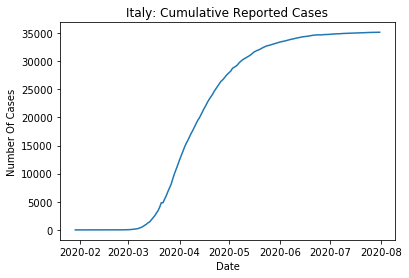

In [12]:
# we begin by isolating the data for Italy, and then we create the plot
# And then we plot the evolution of the cumulative cases in the time 

Italy  = who_time_series[who_time_series["Country"] == "Italy"]
plt.plot(Italy["Date_reported"], Italy["Cumulative_deaths"])
plt.title('Italy: Cumulative Reported Cases')
plt.xlabel('Date')
plt.ylabel('Number Of Cases')
plt.show()

Until March, the number of cumulative cases stays very low. But then the number starts to grow very fast (the line on the graph goes upwards very rapidly in March), and it maintains that fast pace until May. The growth then starts to settle down, and on the graph, we see an almost horizontal line.

Generally, a quantity that increases very quickly in the beginning — and then it slows down more and more over time — has a logarithmic growth.

In the March-July period (thus excluding January and February), Italy had a logarithmic growth in the number of cumulative cases because there were many new cases in the March-April period, but then the number of new cases started to decrease. The line on the graph will become perfectly horizontal when there will be no more new cases.

If we look at Democratic Republic of the Congo, we can see another type of growth:

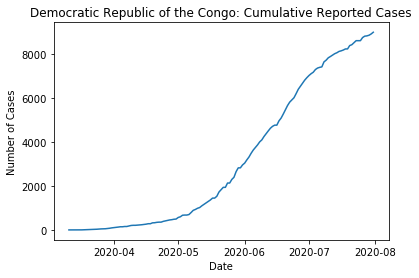

In [16]:
def plot_cumulative_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['Cumulative_cases'])
    plt.title('{}: Cumulative Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()

plot_cumulative_cases("Democratic Republic of the Congo")

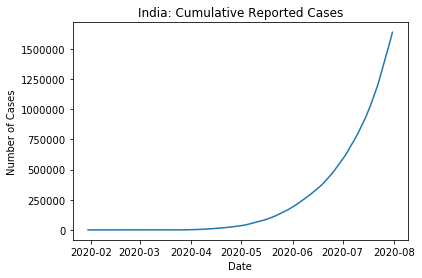

In [17]:
# If we look at India, we can see another type of growth:

plot_cumulative_cases("India")

The number of cumulative cases increases very slowly in the February-May period (the line is almost horizontal). But then the growth becomes fast (the line rapidly switches direction upwards), and it gets faster and faster over time, without showing any sign of slowing down.

Generally, a quantity that increases slowly in the beginning — but then starts growing faster and faster over time — has exponential growth.

India shows exponential growth for the data we have, but when the number of new cases will decrease, the growth (of cumulative cases) will become logarithmic.

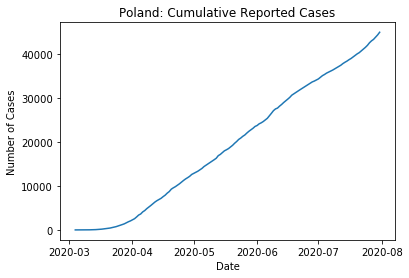

In [18]:
# Now, let's plot a line graph for Poland to see another type of growth:

plot_cumulative_cases('Poland')

If we look at the April-July period, we can see an approximately straight line. There are a few variations here and there, but no obvious curves like we see for Italy or India. The number of cases increases nonetheless, but it increases at a constant rate.

Generally, a quantity that increases constantly over time has linear growth.

If we look at the evolution of new cases in Belarus, for instance, we see many irregularities on the line graph:

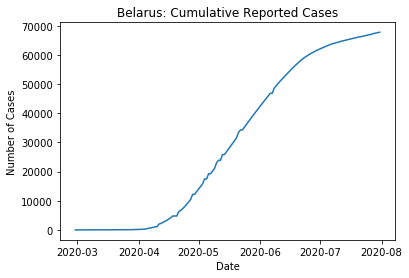

In [21]:
plot_cumulative_cases('Belarus')

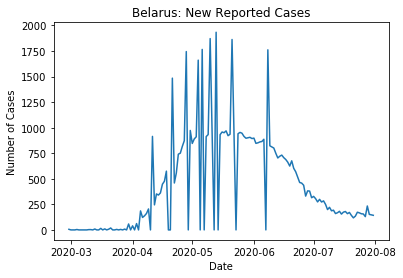

In [23]:
def plot_new_cases(country_name):
    country = who_time_series[who_time_series['Country'] == country_name]
    plt.plot(country['Date_reported'], country['New_cases'])
    plt.title('{}: New Reported Cases'.format(country_name))
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.show()

plot_new_cases('Belarus')

In the April-July period, we see several spikes on the graph going either upward or downward. For some days, the number of new cases gets close to 2,000 (the upward spikes), while for others is zero (the downwards spikes). These large variations suggest that the reports didn't arrive daily — it may be that no one sent reports over the weekends or on national holidays. The number of new cases keeps increasing until the next report, and then we see one of those upward spikes.

* How does the United Kingdom compare to France with respect to the evolution of cumulative new cases?
* How does Mexico compare to the United States with respect to the cummulative number of deaths?
* How does the evolution of new reported cases compare between India, Indonesia, and China?
* How does the evolution of total cases compare between Europe and Asia? Or between Africa and South America?

First, let's visualize the evolution of cumulative cases for France and the United Kingdom

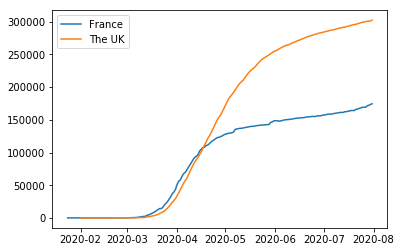

In [27]:
france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']

plt.plot(france['Date_reported'], france['Cumulative_cases'],
         label='France')
plt.plot(uk['Date_reported'], uk['Cumulative_cases'],
         label='The UK')
plt.legend()
plt.show()

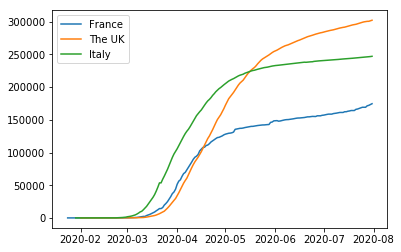

In [29]:

france = who_time_series[who_time_series['Country'] == 'France']
uk = who_time_series[who_time_series['Country'] == 'The United Kingdom']
italy = who_time_series[who_time_series['Country'] == 'Italy']

plt.plot(france["Date_reported"], france["Cumulative_cases"],label = 'France')

plt.plot(uk["Date_reported"], uk["Cumulative_cases"],label = 'The UK')

plt.plot(italy["Date_reported"], italy["Cumulative_cases"],label = 'Italy')
plt.legend()
plt.show()


In [30]:
# Which country has the greatest number of cases at the end of July? Assign your answer as a string to the variable greatest_july — choose between the strings 'France', 'The UK', and 'Italy'.
# Which country has the lowest number of cases at the end of July? Assign your answer as a string to the variable lowest_july.
# Which country shows the greatest increase during March? Assign your answer as a string to the variable increase_march.

greatest_july = 'The UK'
lowest_july = 'France'
increase_march = 'Italy'